## Project Title :  Auto Insurance Risk Assessment

## Objectives:
 * Identify key factors that influence claim rates
* Determine which demographic groups have highest/lowest risk
* Assess impact of driving history on claims
* Evaluate role of income, credit score in predicting claims
* Develop risk model to predict likelihood of claim

# 1. Importing Libraries

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
# Data loading
data = pd.read_csv("C:/Users/lohithlikith/Documents/Datasets/Car Insurance/Car_Insurance_Claim.csv")
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


# 2. Data loading and overview

In [3]:
### Understanding the data

# Information about dataset


Categorical Variables:

ID: Unique identifier for each entry in the dataset.

AGE: Age of the individual, categorized into different age groups (16-25, 26-39, 40-64, 65+).

GENDER: Gender of the individual (male, female).

RACE: Race of the individual (majority).

DRIVING_EXPERIENCE: Driving experience of the individual, categorized into different ranges (0-9 years, 10-19 years, 30 years+).

EDUCATION: Educational background of the individual (high school, university).

INCOME: Income level of the individual, categorized into different classes (poverty, working class, middle class, upper class).

VEHICLE_OWNERSHIP: Indicates whether the individual owns a vehicle (0 - No, 1 - Yes).

VEHICLE_YEAR: Year of the vehicle (before 2015, after 2015).

MARRIED: Marital status of the individual (0 - No, 1 - Yes).

CHILDREN: Indicates whether the individual has children (0 - No, 1 - Yes).

POSTAL_CODE: Postal code of the individual.

VEHICLE_TYPE: Type of the vehicle (sedan, sports car).

SPEEDING_VIOLATIONS: Number of speeding violations by the individual.

DUIS: Number of driving under the influence (DUI) incidents by the individual.

PAST_ACCIDENTS: Number of past accidents involving the individual.

Numerical Variables:

CREDIT_SCORE: Credit score of the individual.

ANNUAL_MILEAGE: Annual mileage driven by the individual.

OUTCOME: Indicates the outcome of the insurance claim (0 - No claim, 1 - Claim filed).


In [4]:
## to get top 5 rows of dataset
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [5]:
## to get bottom 5 rows of dataset
data.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


In [6]:
# Print the dimensions of the DataFrame
num_rows, num_cols = data.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 10000
Number of columns: 19


In [7]:
#Check the info of the data set which describes null values, data type, memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Data types:

Float64: CREDIT_SCORE, ANNUAL_MILEAGE.

Int64: ID, VEHICLE_OWNERSHIP, MARRIED, CHILDREN, POSTAL_CODE, SPEEDING_VIOLATIONS, DUIS, PAST_ACCIDENTS, OUTCOME.

Object: AGE, GENDER, RACE, DRIVING_EXPERIENCE, EDUCATION, INCOME, VEHICLE_YEAR, VEHICLE_TYPE.

In [8]:
## Describe th data
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


# Output Explanation:

Count: The number of non-null values in each column.

Mean: The average value of the data in each column.
    
Standard Deviation: The measure of the spread or dispersion of the data.
    
Minimum: The smallest value in each column.
    
25th Percentile: The value below which 25% of the data falls.
    
50th Percentile (Median): The middle value in the sorted data (also known as the median).
    
75th Percentile: The value below which 75% of the data falls.
    
Maximum: The largest value in each column.

In [9]:
# Describe categorical data
data.describe(include='object')

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


# Output Explanation:


Count: The number of non-null values in each categorical column.

Unique: The number of unique categories in each column.

Top: The most frequent category in each column.

Frequency: The frequency of the top category in each column.



AGE:

Count: 10000
Unique: 4
Top: 26-39
Frequency: 3063
 
 
GENDER:

Count: 10000
Unique: 2
Top: female
Frequency: 5010
   
   
RACE:

Count: 10000
Unique: 2
Top: majority
Frequency: 9012
    
    
DRIVING_EXPERIENCE:

Count: 10000
Unique: 4
Top: 0-9y
Frequency: 3530
    
    
EDUCATION:

Count: 10000
Unique: 3
Top: high school
Frequency: 4157
    
    
INCOME:

Count: 10000
Unique: 4
Top: upper class
Frequency: 4336
    
    
VEHICLE_YEAR:

Count: 10000
Unique: 2
Top: before 2015
Frequency: 6967
    
    
VEHICLE_TYPE:
    
Count: 10000
Unique: 2
Top: sedan
Frequency: 9523

In [10]:
# column names
data.columns.tolist()

['ID',
 'AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'VEHICLE_YEAR',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'VEHICLE_TYPE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

In [11]:
## objects feature(column) names
objects = list(data.dtypes[data.dtypes == 'object'].index)
objects

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'VEHICLE_TYPE']

In [12]:
## numerical feature(column)
numerical = list(data.dtypes[data.dtypes != 'object'].index)
numerical

['ID',
 'CREDIT_SCORE',
 'VEHICLE_OWNERSHIP',
 'MARRIED',
 'CHILDREN',
 'POSTAL_CODE',
 'ANNUAL_MILEAGE',
 'SPEEDING_VIOLATIONS',
 'DUIS',
 'PAST_ACCIDENTS',
 'OUTCOME']

In [13]:
# Cleaning cayegorical data in our dataset
for col in objects:
    data[col] = data[col].str.replace(" ", "_")
    
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high_school,upper_class,0.629027,1.0,after_2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before_2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high_school,working_class,0.493146,1.0,before_2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working_class,0.206013,1.0,before_2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working_class,0.388366,1.0,before_2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


# 3. Exploratory Data Analysis

# 3.1 checking for duplicate values

In [14]:
## to check duplicate values
data.duplicated().sum()

0

# 3.2 Checking for missing values / null value treatment

In [15]:
# missing values in each column
data.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [16]:
# missing values in percentage
round(data.isnull().sum()/len(data)*100,2)

ID                     0.00
AGE                    0.00
GENDER                 0.00
RACE                   0.00
DRIVING_EXPERIENCE     0.00
EDUCATION              0.00
INCOME                 0.00
CREDIT_SCORE           9.82
VEHICLE_OWNERSHIP      0.00
VEHICLE_YEAR           0.00
MARRIED                0.00
CHILDREN               0.00
POSTAL_CODE            0.00
ANNUAL_MILEAGE         9.57
VEHICLE_TYPE           0.00
SPEEDING_VIOLATIONS    0.00
DUIS                   0.00
PAST_ACCIDENTS         0.00
OUTCOME                0.00
dtype: float64

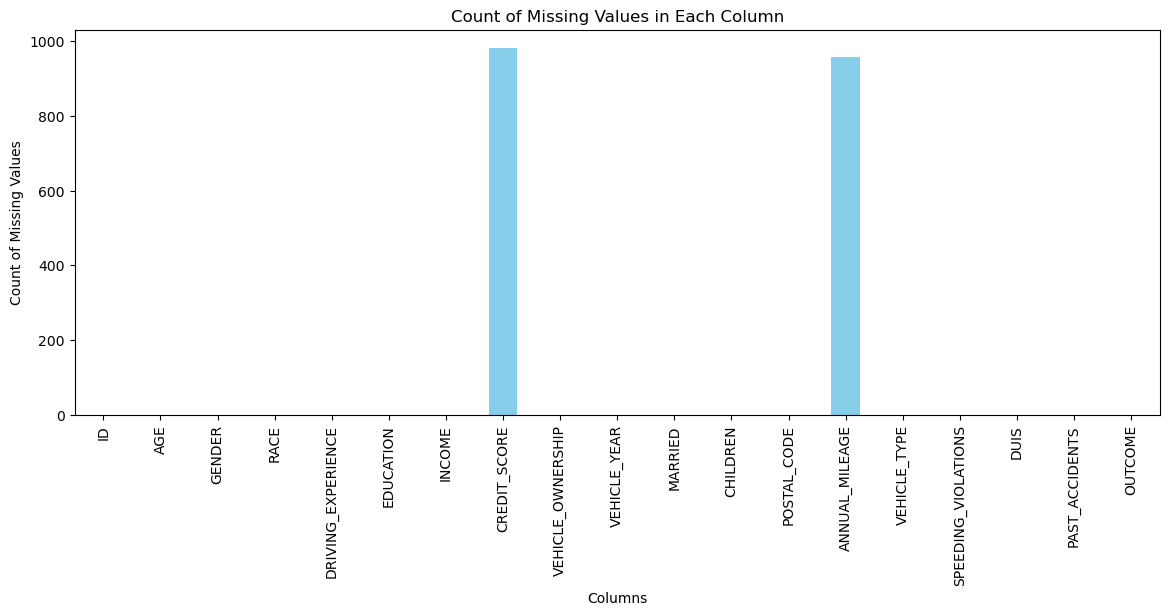

In [17]:
# Calculate the count of missing values in each column
missing_values_count = data.isnull().sum()

# Plot missing values using a bar graph
plt.figure(figsize=(14, 5))
missing_values_count.plot(kind='bar', color='skyblue')
plt.title('Count of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count of Missing Values')
plt.xticks(rotation=90) ##alignment of row names 
plt.show()

CREDIT_SCORE and ANNUAL_MILEAGE have more null values compare to other features or columns.

In [18]:
print(f'There are {data.isnull().any().sum()} columns in Car_Insurance_Claim with missing values.')

There are 2 columns in Car_Insurance_Claim with missing values.


# 3.3 Handling null values

In [19]:
data=data.replace(" ",np.NaN)
data

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high_school,upper_class,0.629027,1.0,after_2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before_2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high_school,working_class,0.493146,1.0,before_2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working_class,0.206013,1.0,before_2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working_class,0.388366,1.0,before_2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper_class,0.582787,1.0,before_2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle_class,0.522231,1.0,after_2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high_school,middle_class,0.470940,1.0,before_2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high_school,poverty,0.364185,0.0,before_2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [20]:
print(data['CREDIT_SCORE'].isnull().sum())

982


In [21]:
# Replace NaN values in the 'CREDIT_SCORE' column with the median
median_credit_score = data['CREDIT_SCORE'].median()
data['CREDIT_SCORE'].fillna(median_credit_score, inplace=True)

In [22]:
median_credit_score

0.5250327586154788

In [23]:
data['CREDIT_SCORE']

0       0.629027
1       0.357757
2       0.493146
3       0.206013
4       0.388366
          ...   
9995    0.582787
9996    0.522231
9997    0.470940
9998    0.364185
9999    0.435225
Name: CREDIT_SCORE, Length: 10000, dtype: float64

In [24]:
# Replace NaN values in the 'ANNUAL_MILEAGE' column with the median
median_ANNUAL_MILEAGE = data['ANNUAL_MILEAGE'].median()
data['ANNUAL_MILEAGE'].fillna(median_ANNUAL_MILEAGE, inplace=True)

In [25]:
median_ANNUAL_MILEAGE

12000.0

In [26]:
# Confirm there are no more missing values
print(data.isnull().sum())

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


There is no missing or null values in the dataset

In [27]:
# Drop the 'ID' column
data = data.drop('ID', axis=1)

In [28]:
data.describe()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.516718,0.697000,0.498200,0.688800,19864.548400,11726.000000,1.482900,0.23920,1.056300,0.313300
std,0.130781,0.459578,0.500022,0.463008,18915.613855,2681.649329,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [29]:
data.describe(include="object")

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high_school,upper_class,before_2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


# Data Visualization

# Get to know the value counts of each value/comparision in the dataset¶

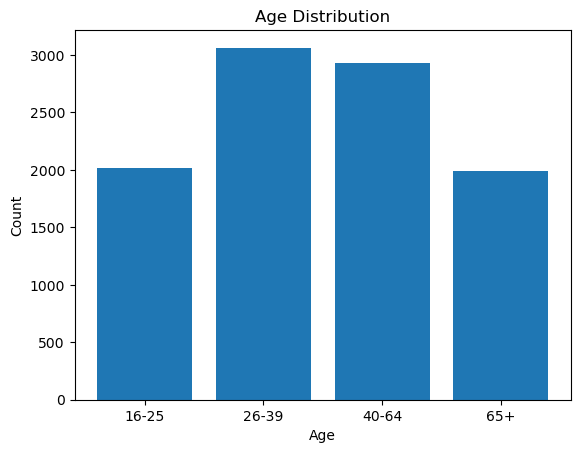

In [30]:
##Graph 1: Bar chart of age distribution
age_counts = data['AGE'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Interpretation

The graph showing the age distribution of the individuals in the dataset. 
It counts the number of individuals in each age group and displays the count on the y-axis.

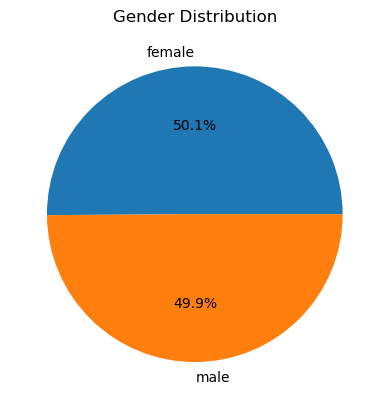

In [31]:
# Graph 2: Pie chart of gender distribution
gender_counts = data['GENDER'].value_counts()
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

Interpretation

The graph is a pie chart illustrating the gender distribution of the individuals in the dataset.
It calculates the percentage of males and females and displays it as a pie chart.

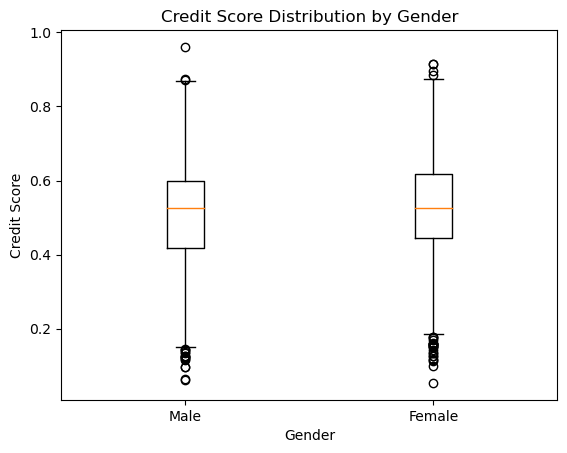

In [32]:
#Graph 3: Box plot of credit scores by gender
plt.boxplot([data[data['GENDER'] == 'male']['CREDIT_SCORE'],
             data[data['GENDER'] == 'female']['CREDIT_SCORE']],
            labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Credit Score')
plt.title('Credit Score Distribution by Gender')
plt.show()

Interpretation

The graph is a box plot comparing the credit scores of males and females.
It displays the distribution of credit scores for each gender, including the median, quartiles, and outliers.

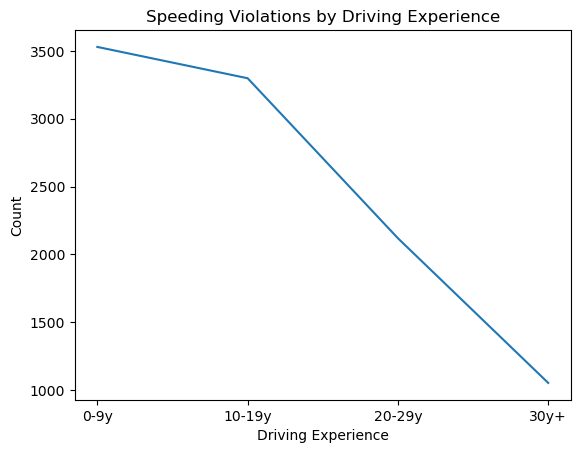

In [33]:
# Graph 4: Line plot of speeding violations by driving experience
driving_exp_counts = data['DRIVING_EXPERIENCE'].value_counts().sort_index()
plt.plot(driving_exp_counts.index, driving_exp_counts.values)
plt.xlabel('Driving Experience')
plt.ylabel('Count')
plt.title('Speeding Violations by Driving Experience')
plt.show()

Interpretation

The graph is a line plot showing the number of speeding violations for each driving experience category. 
It plots the count of speeding violations against different levels of driving experience.

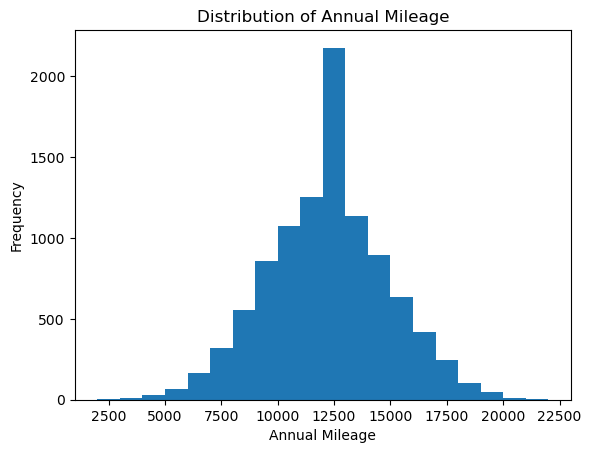

In [34]:
# Graph 5: Histogram of annual mileage
plt.hist(data['ANNUAL_MILEAGE'], bins=20)
plt.xlabel('Annual Mileage')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Mileage')
plt.show()

Interpretation

The graph is a histogram that shows the distribution of the annual mileage of the vehicles.
It divides the data into 20 bins and displays the frequency of vehicles falling into each bin.

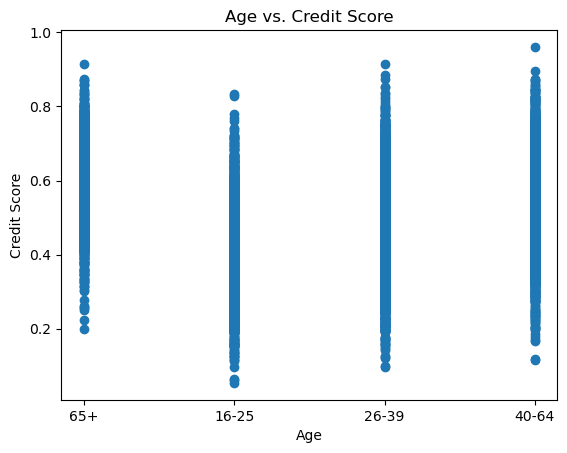

In [35]:
# Graph 2: Scatter plot of age vs. credit score
plt.scatter(data['AGE'], data['CREDIT_SCORE'])
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Age vs. Credit Score')
plt.show()

Interpretation

The graph is a scatter plot that represents the relationship between age and credit score.
Each data point represents an individual, and their age is plotted against their credit score.

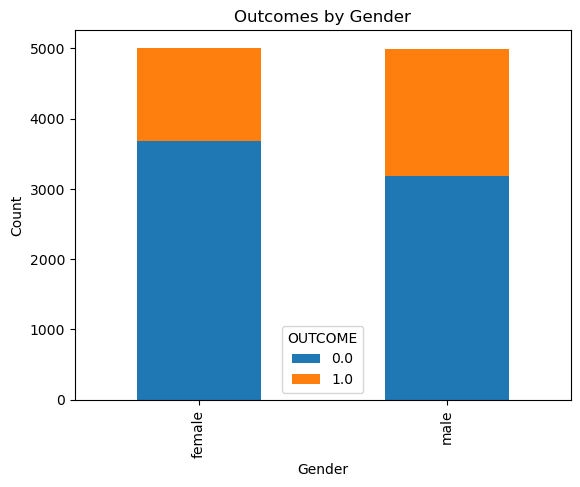

In [36]:
# Graph 3: Stacked bar chart of outcomes by gender
outcomes_by_gender = data.groupby(['GENDER', 'OUTCOME']).size().unstack()
outcomes_by_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Outcomes by Gender')
plt.show()

Interpretation

The graph is a stacked bar chart that illustrates the outcomes of car insurance claims for each gender. 
It shows the count of different outcomes (e.g., 0 or 1) for male and female policyholders.

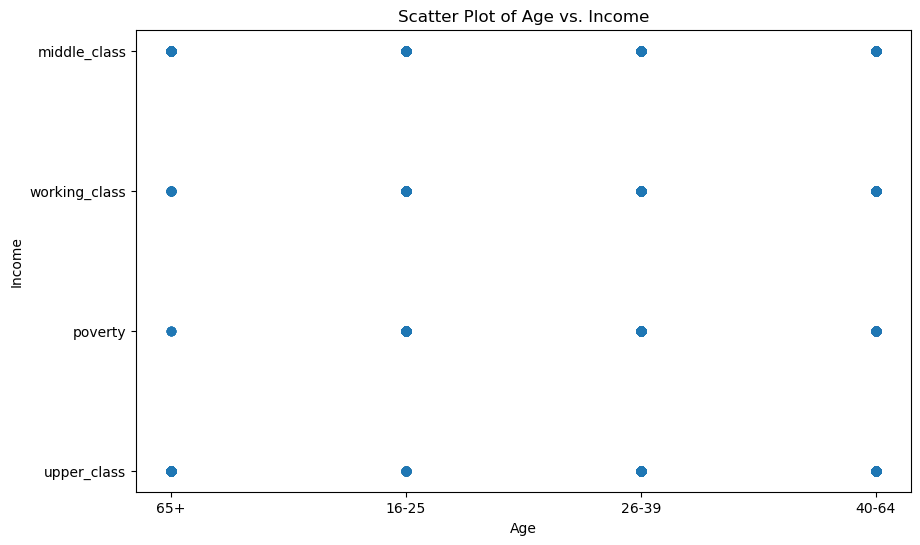

In [37]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['AGE'], data['INCOME'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.show()

In [38]:
# Exclude non-numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
numeric_data = data[numeric_columns]


In [39]:
numeric_data

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0,0.0
1,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0,1.0
2,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0,0.0
3,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0,0.0
4,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.582787,1.0,0.0,0.0,10238,16000.0,0,0,1,0.0
9996,0.522231,1.0,0.0,1.0,32765,12000.0,1,0,0,0.0
9997,0.470940,1.0,0.0,1.0,10238,14000.0,0,0,0,0.0
9998,0.364185,0.0,0.0,1.0,10238,13000.0,2,0,1,1.0


In [40]:
# Calculate the correlation matrix
corr_matrix = numeric_data.corr()


# Correlation with OUTCOME

In [41]:
corr_matrix

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
CREDIT_SCORE,1.000000,0.295310,0.266744,0.209448,0.008759,-0.157839,0.194658,0.120966,0.172008,-0.308998
VEHICLE_OWNERSHIP,0.295310,1.000000,0.175626,0.125990,-0.004866,-0.092527,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.266744,0.175626,1.000000,0.287009,0.012045,-0.439227,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.209448,0.125990,0.287009,1.000000,0.020911,-0.425509,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.008759,-0.004866,0.012045,0.020911,1.000000,-0.126802,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.157839,-0.092527,-0.439227,-0.425509,-0.126802,1.000000,-0.308303,-0.111454,-0.187678,0.178041
SPEEDING_VIOLATIONS,0.194658,0.133868,0.218855,0.220415,0.113686,-0.308303,1.000000,0.359838,0.443074,-0.291862
DUIS,0.120966,0.086567,0.120840,0.115354,0.038492,-0.111454,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.172008,0.119521,0.215269,0.206295,-0.116985,-0.187678,0.443074,0.259359,1.000000,-0.311495
OUTCOME,-0.308998,-0.378921,-0.262104,-0.232835,0.095889,0.178041,-0.291862,-0.189352,-0.311495,1.000000


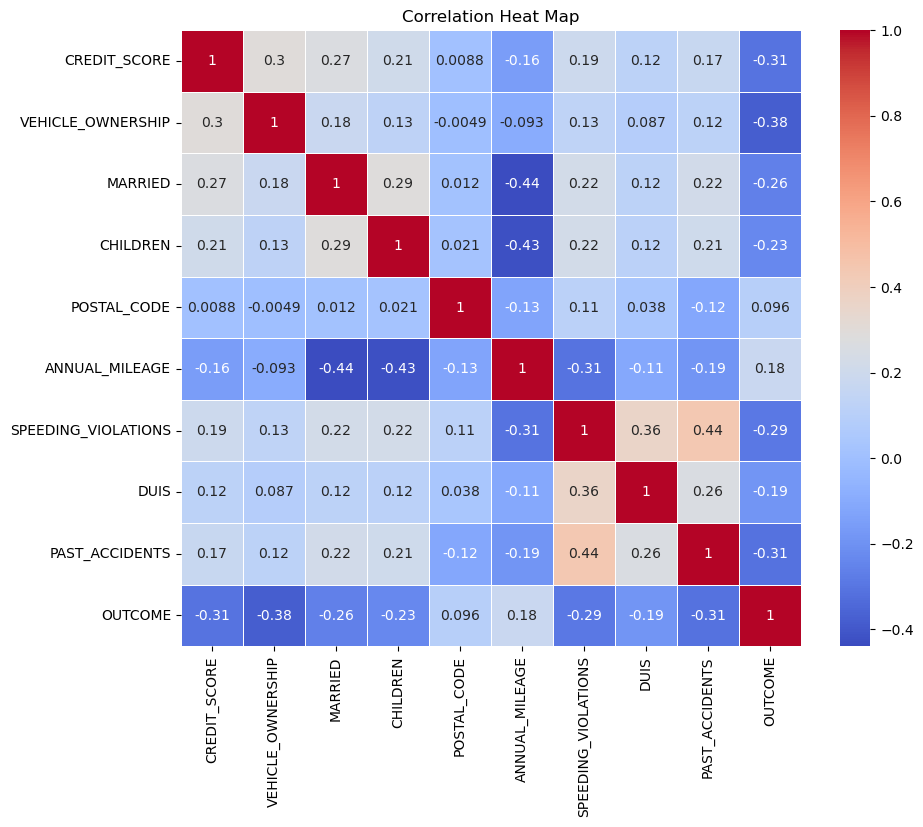

In [42]:
# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heat Map')
plt.show()

Interpretation

1.Correlation Strength:

The heat map uses color to represent the strength of correlation between variables. Darker colors indicate stronger correlations, while lighter colors indicate weaker or no correlations.
Positive correlations (values closer to 1) are represented by warm colors (e.g., red), indicating that as one variable increases, the other tends to increase as well.
Negative correlations (values closer to -1) are represented by cool colors (e.g., blue), indicating that as one variable increases, the other tends to decrease.

2.Correlation Values:

The heat map includes numeric values within each cell, indicating the correlation coefficient between pairs of variables.
These values range from -1 to 1, where -1 represents a strong negative correlation, 0 represents no correlation, and 1 represents a strong positive correlation.
The numeric values provide a quantitative measure of the strength and direction of the correlations.

# Checking Relation between all categorical variables and dependent variables

In [43]:
categorical = list(data.dtypes[data.dtypes == 'object'].index)
categorical

['AGE',
 'GENDER',
 'RACE',
 'DRIVING_EXPERIENCE',
 'EDUCATION',
 'INCOME',
 'VEHICLE_YEAR',
 'VEHICLE_TYPE']

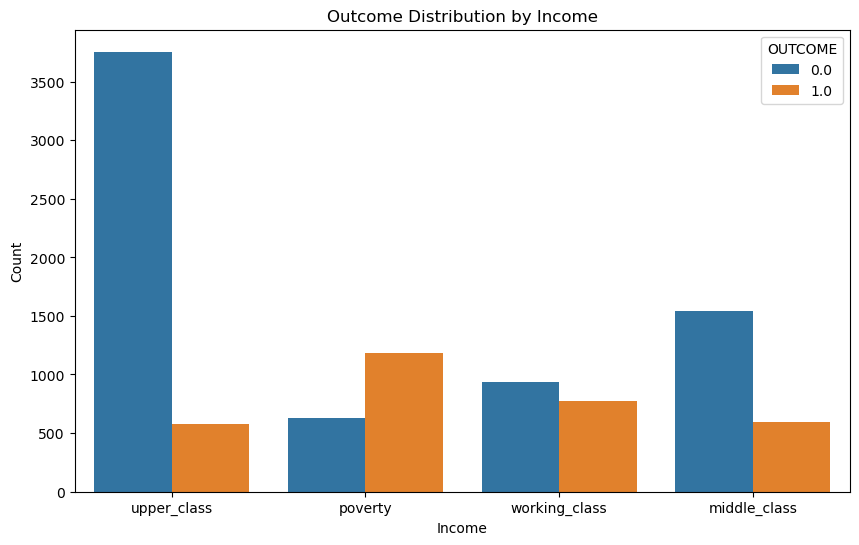

In [44]:
# Bar plot of dependent variable by a categorical independent variable
plt.figure(figsize=(10, 6))
sns.countplot(x='INCOME', hue='OUTCOME', data=data)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Outcome Distribution by Income')
plt.show()

# relationship of Numerical Variables with dependent variable

In [45]:
# Select numerical independent variables and the dependent variable
numerical_vars = ['AGE', 'INCOME']
dependent_var = 'OUTCOME'

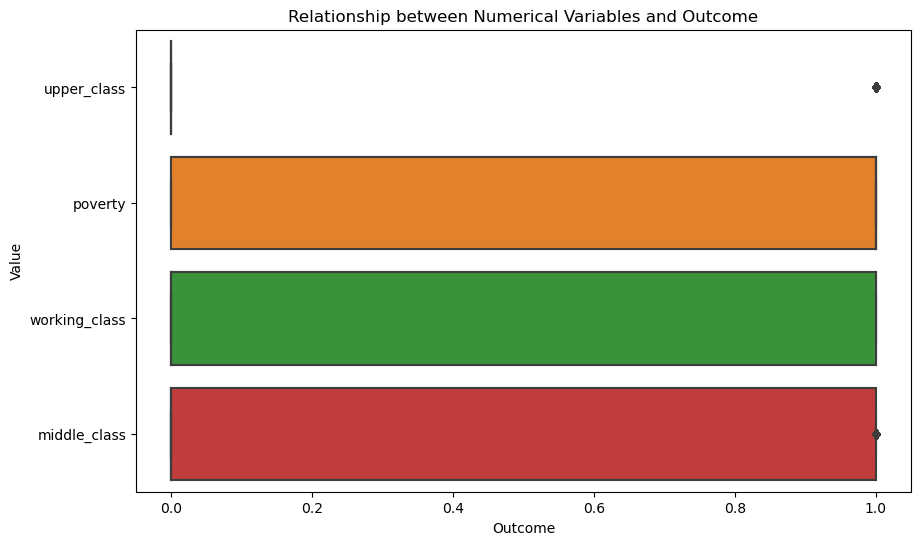

In [46]:
# Box plot of numerical variables by the dependent variable
plt.figure(figsize=(10, 6))
for var in numerical_vars:
    sns.boxplot(x=dependent_var, y=var, data=data)
plt.xlabel('Outcome')
plt.ylabel('Value')
plt.title('Relationship between Numerical Variables and Outcome')
plt.show()

# Checking for normality

based on plot/graph

based on skewness(value between -0.5 to 0.5)

based on some tests like shapiro(p value > 0.5) etc

In [47]:
# Assuming 'data' is your DataFrame
df = numeric_data.select_dtypes(include='number')
skewness_all_columns = df.skew()

# Print the skewness values for all numeric columns
print("Skewness of all numeric columns:")
print(skewness_all_columns)

Skewness of all numeric columns:
CREDIT_SCORE          -0.258131
VEHICLE_OWNERSHIP     -0.857479
MARRIED                0.007201
CHILDREN              -0.815701
POSTAL_CODE            2.682827
ANNUAL_MILEAGE         0.009886
SPEEDING_VIOLATIONS    2.365459
DUIS                   2.757886
PAST_ACCIDENTS         2.148949
OUTCOME                0.805148
dtype: float64


In [48]:
selected_columns =pd.DataFrame(df[['CREDIT_SCORE', 'POSTAL_CODE', 'ANNUAL_MILEAGE']])

In [49]:
selected_columns

,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE
0,0.629027,10238,12000.0
1,0.357757,10238,16000.0
2,0.493146,10238,11000.0
3,0.206013,32765,11000.0
4,0.388366,32765,12000.0
...,...,...,...
9995,0.582787,10238,16000.0
9996,0.522231,32765,12000.0
9997,0.470940,10238,14000.0
9998,0.364185,10238,13000.0


In [50]:
selected_columns.skew()

# Print the skewness values for all numeric columns
print("Skewness of all selected_columns:")

print(skewness_all_columns)

Skewness of all selected_columns:
CREDIT_SCORE          -0.258131
VEHICLE_OWNERSHIP     -0.857479
MARRIED                0.007201
CHILDREN              -0.815701
POSTAL_CODE            2.682827
ANNUAL_MILEAGE         0.009886
SPEEDING_VIOLATIONS    2.365459
DUIS                   2.757886
PAST_ACCIDENTS         2.148949
OUTCOME                0.805148
dtype: float64


# Power Transformation

In [51]:
from sklearn import preprocessing
PT = preprocessing.PowerTransformer()
selected_columns['POSTAL_CODE']=PT.fit_transform(numeric_data[['POSTAL_CODE']])
selected_columns['POSTAL_CODE'].skew()

0.8537935040645013

# shapiro test

In [52]:
import numpy as np
from scipy import stats

np.random.seed(20)
sample_size = 30
sample = np.random.choice(numeric_data['POSTAL_CODE'], sample_size, replace=False)

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(sample)
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")
    
print(p_value)


Sample does not look Gaussian (reject H0)
4.43214309697737e-09


<Axes: xlabel='POSTAL_CODE', ylabel='Density'>

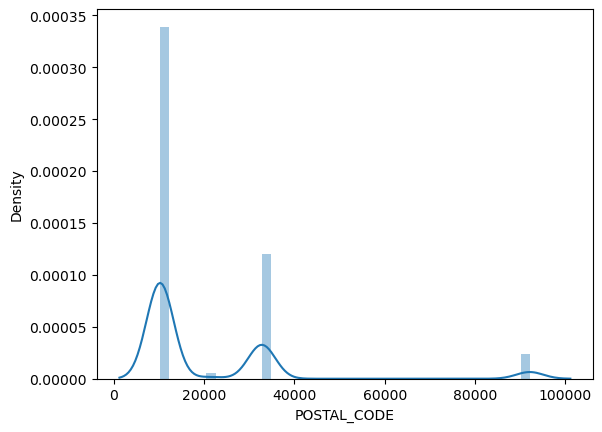

In [53]:
sns.distplot(data['POSTAL_CODE'])

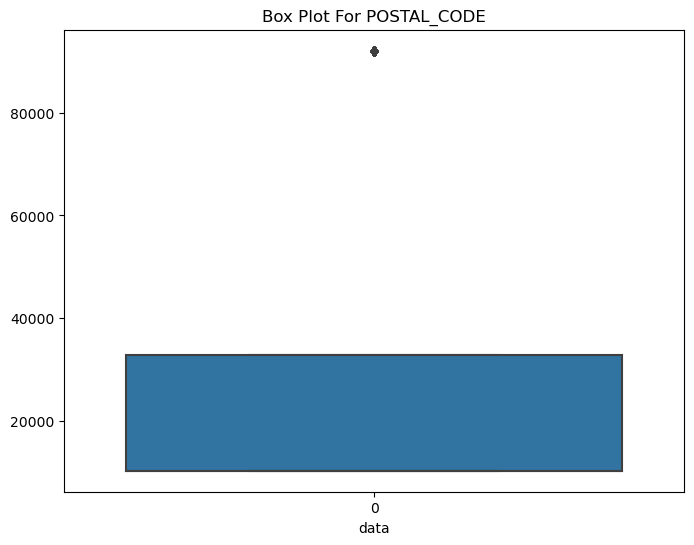

In [54]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data['POSTAL_CODE'], whis=1.5)  # Increase whis to extend the whiskers
plt.title('Box Plot For POSTAL_CODE')
plt.xlabel('data')
plt.show()

In [55]:
# Calculate quartiles
outlier_multiplier = 1.5  
q1 = data['POSTAL_CODE'].quantile(0.25)
q3 = data['POSTAL_CODE'].quantile(0.75)

# Calculate interquartile range (IQR)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - outlier_multiplier * iqr
upper_bound = q3 + outlier_multiplier * iqr

# Identify outliers
outliers = data[(data['POSTAL_CODE'] < lower_bound) | (data["POSTAL_CODE"] > upper_bound)]
print("the total number of outlier is:",len(outliers))
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

the total number of outlier is: 484
Lower bound: -23552.5
Upper bound: 66555.5


# Hypothesis for normality test

Null Hypothesis (H0): The data is normally distributed.

Alternative Hypothesis (H1): The data is not normally distributed.

During hypothesis testing, if the p-value obtained from the normality test is less than the chosen significance level (usually 0.05)

we reject the null hypothesis in favor of the alternative hypothesis. This indicates that there is sufficient evidence to conclude that the data significantly deviates from a normal distribution.

In [56]:
## if p value greater than 0.05 then the data follow normal or data is normally distributed

In [58]:
import scipy.stats as stats
# Randomly select a sample from the dataset
sample_size = 30
sample = np.random.choice(data['POSTAL_CODE'],sample_size, replace=False)

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(sample)
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")
    
print(p_value)

Sample does not look Gaussian (reject H0)
1.3592343917068206e-09


In [59]:
np.random.seed(20)
sample_size = 30
sample = np.random.choice(data['CREDIT_SCORE'],sample_size, replace=False)

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(sample)
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")
    
print(p_value)

Sample looks Gaussian (fail to reject H0)
0.2980966866016388


In [60]:
np.random.seed(20)
sample_size = 30
sample = np.random.choice(data['ANNUAL_MILEAGE'],sample_size, replace=False)

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(sample)
alpha = 0.05
if p_value > alpha:
    print("Sample looks Gaussian (fail to reject H0)")
else:
    print("Sample does not look Gaussian (reject H0)")
    
print(p_value)

Sample looks Gaussian (fail to reject H0)
0.09365150332450867


In [61]:
"""
To remove outliers of multiple column

Define columns to check for outliers
>num_cols = data[['POSTAL_CODE']]

for col in num_cols:

    # Calculate 25th and 75th percentile
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75) 
    iqr = q75 - q25
    
    # Calculate outlier cut-off
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    # Identify outliers
    outliers = [x for x in df[col] if x < lower or x > upper]
    print(f"Identified {len(outliers)} outliers for '{col}'")

    # Remove outliers
    df = df[~((df[col] < lower) | (df[col] > upper))]
    
print("Removed outliers")
print(df.shape)
"""

'\nTo remove outliers of multiple column\n\nDefine columns to check for outliers\n>num_cols = data[[\'POSTAL_CODE\']]\n\nfor col in num_cols:\n\n    # Calculate 25th and 75th percentile\n    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75) \n    iqr = q75 - q25\n    \n    # Calculate outlier cut-off\n    cut_off = iqr * 1.5\n    lower, upper = q25 - cut_off, q75 + cut_off\n\n    # Identify outliers\n    outliers = [x for x in df[col] if x < lower or x > upper]\n    print(f"Identified {len(outliers)} outliers for \'{col}\'")\n\n    # Remove outliers\n    df = df[~((df[col] < lower) | (df[col] > upper))]\n    \nprint("Removed outliers")\nprint(df.shape)\n'

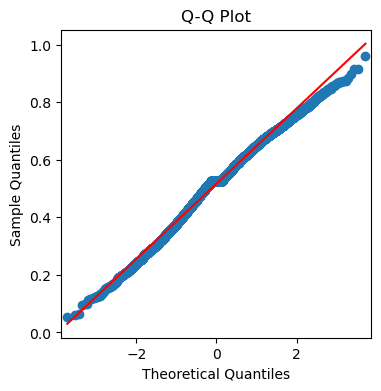

In [62]:
## another method to check normality
## data follows a normal distribution, the points on the Q-Q plot should fall approximately along the diagonal line.
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(4, 4))
sm.qqplot(numeric_data['CREDIT_SCORE'], line='s', ax=ax)
ax.set_title('Q-Q Plot')
plt.show()

## Determine which demographic groups have highest/lowest risk

In [63]:
import pandas as pd

# Group the data by demographic groups and calculate claim rates
grouped_data = data.groupby(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION']).mean()['OUTCOME']

# Sort the claim rates in descending order
sorted_claim_rates = grouped_data.sort_values(ascending=False)

# Get the demographic groups with highest and lowest claim rates
highest_risk_group = sorted_claim_rates.index[0]
lowest_risk_group = sorted_claim_rates.index[-1]

print("Demographic Group with Highest Risk:")
print(highest_risk_group)
print("\nDemographic Group with Lowest Risk:")
print(lowest_risk_group)

Demographic Group with Highest Risk:
('65+', 'male', 'minority', '20-29y', 'none')

Demographic Group with Lowest Risk:
('65+', 'male', 'minority', '30y+', 'university')


# Encoding convert categorical to numerical

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [65]:
### or use replace method based on counts
## label encoading
# LE = preprocessing.LabelEncoder()

In [100]:
# Encoding:
Team_AGE = {'65+': 0, '16-25': 1, '40-64': 2, '26-39': 3}

# Replace categorical values with numerical values using replace function
data['AGE'] = data['AGE'].replace(Team_AGE)
data['AGE']

0       0
1       1
2       1
3       1
4       3
       ..
9995    3
9996    3
9997    3
9998    3
9999    3
Name: AGE, Length: 10000, dtype: int64

In [67]:
data['GENDER'].value_counts()

female    5010
male      4990
Name: GENDER, dtype: int64

In [101]:
# Encoding:
Team_GENDER = {'male': 0, 'female': 1}

# Replace categorical values with numerical values using replace function
data['GENDER'] = data['GENDER'].replace(Team_GENDER)
data['GENDER']

0       1
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    1
Name: GENDER, Length: 10000, dtype: int64

In [102]:
data['RACE'].value_counts()

1    9012
0     988
Name: RACE, dtype: int64

In [103]:
# Encoding:
Team_RACE = {'minority': 0, 'majority': 1}

# Replace categorical values with numerical values using replace function
data['RACE'] = data['RACE'].replace(Team_RACE)
data['RACE']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: RACE, Length: 10000, dtype: int64

In [71]:
data['DRIVING_EXPERIENCE'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: DRIVING_EXPERIENCE, dtype: int64

In [104]:
data

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,1,3,2,3,0.629027,1.0,after_2015,0.0,1.0,10238,12000.0,1,0,0,0,0.0
1,1,0,1,3,0,1,0.357757,0.0,before_2015,0.0,0.0,10238,16000.0,1,0,0,0,1.0
2,1,1,1,3,2,0,0.493146,1.0,before_2015,0.0,0.0,10238,11000.0,1,0,0,0,0.0
3,1,0,1,3,1,0,0.206013,1.0,before_2015,0.0,1.0,32765,11000.0,1,0,0,0,0.0
4,3,0,1,2,0,0,0.388366,1.0,before_2015,0.0,0.0,32765,12000.0,1,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,2,1,3,0.582787,1.0,before_2015,0.0,0.0,10238,16000.0,1,0,0,1,0.0
9996,3,1,1,2,0,2,0.522231,1.0,after_2015,0.0,1.0,32765,12000.0,1,1,0,0,0.0
9997,3,0,1,3,2,2,0.470940,1.0,before_2015,0.0,1.0,10238,14000.0,1,0,0,0,0.0
9998,3,1,1,2,2,1,0.364185,0.0,before_2015,0.0,1.0,10238,13000.0,1,2,0,1,1.0


In [105]:
data['EDUCATION'].value_counts()

2    4157
1    3928
0    1915
Name: EDUCATION, dtype: int64

In [106]:
# Encoding:
Team_EDUCATION = {'none': 0, 'university': 1, 'high_school':2}

# Replace categorical values with numerical values using replace function
data['EDUCATION'] = data['EDUCATION'].replace(Team_EDUCATION)
data['EDUCATION']

0       2
1       0
2       2
3       1
4       0
       ..
9995    1
9996    0
9997    2
9998    2
9999    0
Name: EDUCATION, Length: 10000, dtype: int64

In [107]:
data['INCOME'].value_counts()

3    4336
2    2138
1    1814
0    1712
Name: INCOME, dtype: int64

In [108]:
# Encoding:
Team_INCOME = {'working_class': 0, 'poverty': 1, 'middle_class':2, 'upper_class':3}

# Replace categorical values with numerical values using replace function
data['INCOME'] = data['INCOME'].replace(Team_INCOME)
data['INCOME']

0       3
1       1
2       0
3       0
4       0
       ..
9995    3
9996    2
9997    2
9998    1
9999    0
Name: INCOME, Length: 10000, dtype: int64

In [109]:
data['VEHICLE_YEAR'].value_counts()

before_2015    6967
after_2015     3033
Name: VEHICLE_YEAR, dtype: int64

In [111]:
# Encoding:
Team_VEHICLE_YEAR = {'after_2015': 0, 'before_2015': 1}

# Replace categorical values with numerical values using replace function
data['VEHICLE_YEAR'] = data['VEHICLE_YEAR'].replace(Team_VEHICLE_YEAR)
data['VEHICLE_YEAR']

0       0
1       1
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    1
9998    1
9999    1
Name: VEHICLE_YEAR, Length: 10000, dtype: int64

In [112]:
data['VEHICLE_TYPE'].value_counts()

1             9523
sports_car     477
Name: VEHICLE_TYPE, dtype: int64

In [115]:
# Encoding:
Team_VEHICLE_TYPE = {'sports_car': 0, 'sedan': 1}

# Replace categorical values with numerical values using replace function
data['VEHICLE_TYPE'] = data['VEHICLE_TYPE'].replace(Team_VEHICLE_TYPE)
data['VEHICLE_TYPE']

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: VEHICLE_TYPE, Length: 10000, dtype: int64

# t-test for one sample

When you want to compare the mean of a single sample to a known or hypothesized population mean.

Null Hypothesis (H0): The mean of the population is equal to a specified value (μ = μ0).

Alternative Hypothesis (H1): The mean of the population is not equal to the specified value (μ ≠ μ0) or is greater than or less than the specified value (for one-tailed tests).

In [81]:
mu_0 = np.mean(df['POSTAL_CODE'])

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data['POSTAL_CODE'], mu_0)

# Print the results
print("One-Sample T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: there is insufficient evidence to suggest that the sample mean differs from the population mean.")

One-Sample T-test Results:
T-statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis: there is insufficient evidence to suggest that the sample mean differs from the population mean.


In [82]:
df=data.copy()
df

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,0,1,1,3,high_school,upper_class,0.629027,1.0,after_2015,0.0,1.0,10238,12000.0,1,0,0,0,0.0
1,1,0,1,3,0,1,0.357757,0.0,before_2015,0.0,0.0,10238,16000.0,1,0,0,0,1.0
2,1,1,1,3,high_school,working_class,0.493146,1.0,before_2015,0.0,0.0,10238,11000.0,1,0,0,0,0.0
3,1,0,1,3,1,working_class,0.206013,1.0,before_2015,0.0,1.0,32765,11000.0,1,0,0,0,0.0
4,3,0,1,2,0,working_class,0.388366,1.0,before_2015,0.0,0.0,32765,12000.0,1,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,1,1,2,1,upper_class,0.582787,1.0,before_2015,0.0,0.0,10238,16000.0,1,0,0,1,0.0
9996,3,1,1,2,0,middle_class,0.522231,1.0,after_2015,0.0,1.0,32765,12000.0,1,1,0,0,0.0
9997,3,0,1,3,high_school,middle_class,0.470940,1.0,before_2015,0.0,1.0,10238,14000.0,1,0,0,0,0.0
9998,3,1,1,2,high_school,1,0.364185,0.0,before_2015,0.0,1.0,10238,13000.0,1,2,0,1,1.0


In [83]:
mu_0 = np.mean(df['CREDIT_SCORE'])

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['CREDIT_SCORE'], mu_0)

# Print the results
print("One-Sample T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: there is insufficient evidence to suggest that the sample mean differs from the population mean.")

One-Sample T-test Results:
T-statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis: there is insufficient evidence to suggest that the sample mean differs from the population mean.


In [84]:
mu_0 = np.mean(df['ANNUAL_MILEAGE'])

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(df['ANNUAL_MILEAGE'], mu_0)

# Print the results
print("One-Sample T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: there is insufficient evidence to suggest that the sample mean differs from the population mean.")

One-Sample T-test Results:
T-statistic: 0.0
P-value: 1.0
Fail to reject the null hypothesis: there is insufficient evidence to suggest that the sample mean differs from the population mean.


# t-test for two sample

When you want to compare the means of two independent groups to determine if they differ significantly.

null_hypothesis: The population means of the two groups are equal

alternate_hypothesis: The population means of the two groups are not equal

In [85]:
# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(df['CREDIT_SCORE'], df['ANNUAL_MILEAGE'])

# Print the results
print("Two-Sample T-test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: the means of the two groups are significantly different.")
else:
    print("Fail to reject the null hypothesis: there is insufficient evidence to suggest that the means of the two groups differ.")

Two-Sample T-test Results:
T-statistic: -437.24894006711753
P-value: 0.0
Reject the null hypothesis: the means of the two groups are significantly different.


# chisquare test

In [86]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['AGE'], data['GENDER'])
print(contingency_table)

# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print('Chi-square statistic:', chi2)
print('P-value:', p)

GENDER     0     1
AGE               
0        995   995
1        982  1034
2       1465  1466
3       1548  1515
Chi-square statistic: 1.6571514407616568
P-value: 0.6465016406899802


### Identify key factors that influence claim rates

In [87]:
import pandas as pd

# Select the relevant columns for analysis
features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

# Calculate the correlation matrix
correlation_matrix = data[features + ['OUTCOME']].corr()

# Sort the correlation matrix by the 'OUTCOME' column
sorted_correlations = correlation_matrix['OUTCOME'].abs().sort_values(ascending=False)

# Print the key factors that influence claim rates
key_factors = sorted_correlations[1:6]  # Select the top 5 factors excluding 'OUTCOME'

print("Key Factors that Influence Claim Rates:")
print(key_factors)

Key Factors that Influence Claim Rates:
DRIVING_EXPERIENCE     0.497431
VEHICLE_OWNERSHIP      0.378921
PAST_ACCIDENTS         0.311495
CREDIT_SCORE           0.308998
SPEEDING_VIOLATIONS    0.291862
Name: OUTCOME, dtype: float64


### Assess impact of driving history on claims

In [88]:
# Calculate claim rates for different levels of driving history
claim_rates = data.groupby(['SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']).mean()['OUTCOME']

# Print the claim rates for each level of driving history
print("Claim Rates by Driving History:")
print(claim_rates)

Claim Rates by Driving History:
SPEEDING_VIOLATIONS  DUIS  PAST_ACCIDENTS
0                    0     0                 0.570654
                           1                 0.167979
                           2                 0.148387
                           3                 0.184211
                           4                 0.318182
                                               ...   
17                   2     2                 0.000000
18                   0     9                 0.000000
19                   0     2                 0.000000
                     1     0                 0.000000
22                   0     6                 0.000000
Name: OUTCOME, Length: 397, dtype: float64


In [89]:
#Interpretation: The output provides the claim rates for various combinations of driving history levels. It allows you to observe how different levels of speeding violations, DUIs, and past accidents impact the likelihood of making an insurance claim, as represented by the claim rates.

## Evaluate role of income, credit score in predicting claims

In [94]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the features (income and credit score) and the target variable (claim)
X = data[['INCOME', 'CREDIT_SCORE']]
y = data['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6915


## Develop risk model to predict likelihood of claim

In [95]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Select the features and target variable
features = data[['INCOME', 'CREDIT_SCORE']]
target = data['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83      1367
         1.0       0.66      0.39      0.49       633

    accuracy                           0.74      2000
   macro avg       0.71      0.65      0.66      2000
weighted avg       0.73      0.74      0.72      2000

Accuracy: 74.40%


In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Select the features and target variable
features = data.drop('OUTCOME', axis=1)
target = data['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1367
         1.0       0.71      0.62      0.66       633

    accuracy                           0.80      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.79      0.80      0.80      2000

Accuracy: 79.95%


In [117]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Select the features and target variable
features = data.drop('OUTCOME', axis=1)
target = data['OUTCOME']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create an SVM classifier
model = SVC()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82      1367
         1.0       1.00      0.03      0.06       633

    accuracy                           0.69      2000
   macro avg       0.85      0.52      0.44      2000
weighted avg       0.79      0.69      0.58      2000

Accuracy: 69.35%
